In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [29]:
df_all = pd.read_csv('../../data/fanfic_regression_data_lda_perplexity.tsv', sep = '\t')

In [30]:
len(df_all)

406336

In [31]:
df_all['Topic_novelty'].head()

0     -66.635948
1   -1016.448404
2   -4030.296780
3    -235.982116
4   -4732.267264
Name: Topic_novelty, dtype: float64

In [32]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty_cent'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty_cent'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [33]:
df_all['Topic_novelty_squared'].head()

0    6.421509e+07
1    4.989472e+07
2    1.640064e+07
3    6.152968e+07
4    1.120777e+07
Name: Topic_novelty_squared, dtype: float64

In [34]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [35]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL', 'Term_novelty', 'Entropy', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_m

In [36]:
# df_all = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
#        'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
#        'Rating_N', 'Rating_T',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [37]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [38]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL', 'Term_novelty', 'Entropy', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_m

In [61]:
def run_logit(df, field, sq_option):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    if sq_option:
        logit_model = sm.Logit(df['binary'], df[['Chapters',\
            'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
            'Freq_relationship', 'Chapters', 'Category_F_F', 'Category_F_M',\
           'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
           'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
           'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
           'ArchiveWarnings_violence',\
           'author_fic_cnt', 'Rating_G',\
           'Rating_M', 'Rating_N', 'Rating_T', \
           'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
           'Fandom_arthurian', 'Fandom_supernatural',
           'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
           'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
           'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
           'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
           'Fandom_ms_paint_adventures', 'Fandom_marvel',
           'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
            'Intercept']]).fit(method='bfgs')
    else:
        logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Topic_novelty',\
        'Freq_relationship', 'Chapters', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [62]:
def run_ols(df, field, sq_option):
    df = run_logit(df, field, sq_option=sq_option)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    if sq_option:
        model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
     + Chapters + Freq_relationship + author_fic_cnt\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    else:
        model = ols( field + " ~ Term_novelty + Topic_novelty\
     + Chapters + Freq_relationship + author_fic_cnt\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [63]:
def run_all():
    global kudos_model_sq_True, kudos_coef_sq_True, kudos_err_sq_True, hits_model_sq_True, hits_coef_sq_True, hits_err_sq_True
    global comments_model_sq_True,comments_coef_sq_True, comments_err_sq_True, bookmarks_model_sq_True, bookmarks_coef_sq_True, bookmarks_err_sq_True
    global ylabels_sq_True

    global kudos_model_sq_False, kudos_coef_sq_False, kudos_err_sq_False, hits_model_sq_False, hits_coef_sq_False, hits_err_sq_False
    global comments_model_sq_False,comments_coef_sq_False, comments_err_sq_False, bookmarks_model_sq_False, bookmarks_coef_sq_False, bookmarks_err_sq_False
    global ylabels_sq_False
    
    kudos_model_sq_True = run_ols(df_all, 'Kudos', sq_option=True)
    kudos_coef_sq_True = np.asarray(list(kudos_model_sq_True.params)[1:-1])
    kudos_err_sq_True = list(kudos_model_sq_True.bse)[1:-1]
    hits_model_sq_True = run_ols(df_all, 'Hits', sq_option=True)
    hits_coef_sq_True = list(hits_model_sq_True.params)[1:-1]
    hits_err_sq_True = list(hits_model_sq_True.bse)[1:-1]
    comments_model_sq_True = run_ols(df_all, 'Comments', sq_option=True)
    comments_coef_sq_True = list(comments_model_sq_True.params)[1:-1]
    comments_err_sq_True = list(comments_model_sq_True.bse)[1:-1]
    bookmarks_model_sq_True = run_ols(df_all, 'Bookmarks', sq_option=True)
    bookmarks_coef_sq_True = list(bookmarks_model_sq_True.params)[1:-1]
    bookmarks_err_sq_True = list(bookmarks_model_sq_True.bse)[1:-1]
    
    kudos_model_sq_False = run_ols(df_all, 'Kudos', sq_option=False)
    kudos_coef_sq_False = np.asarray(list(kudos_model_sq_False.params)[1:-1])
    kudos_err_sq_False = list(kudos_model_sq_False.bse)[1:-1]
    hits_model_sq_False = run_ols(df_all, 'Hits', sq_option=False)
    hits_coef_sq_False = list(hits_model_sq_False.params)[1:-1]
    hits_err_sq_False = list(hits_model_sq_False.bse)[1:-1]
    comments_model_sq_False = run_ols(df_all, 'Comments', sq_option=False)
    comments_coef_sq_False = list(comments_model_sq_False.params)[1:-1]
    comments_err_sq_False = list(comments_model_sq_False.bse)[1:-1]
    bookmarks_model_sq_False = run_ols(df_all, 'Bookmarks', sq_option=False)
    bookmarks_coef_sq_False = list(bookmarks_model_sq_False.params)[1:-1]
    bookmarks_err_sq_False = list(bookmarks_model_sq_False.bse)[1:-1]
    

In [64]:
run_all()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.470111
         Iterations: 2
         Function evaluations: 34
         Gradient evaluations: 16


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs

         Current function value: 0.460841
         Iterations: 3
         Function evaluations: 30
         Gradient evaluations: 12


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.501279
         Iterations: 35
         Function evaluations: 53
         Gradient evaluations: 42


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.390283
         Iterations: 35
         Function evaluations: 52
         Gradient evaluations: 42


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [65]:
bookmarks_model_sq_True.aic

843195.8676698946

In [66]:
kudos_coef_sq_False

array([-6.78315483e-01,  2.23085573e-05,  1.69447863e-02,  3.52513310e-01,
        1.58867221e-06, -4.34904624e-02, -1.28105007e-01, -1.71651823e-01,
        2.32002631e-01, -8.64916086e-02, -1.24072498e-01,  1.08981047e-01,
       -4.89458212e-01, -2.50896975e-01, -1.35979049e-01, -3.47524538e-02,
       -7.54241646e-02,  3.88161731e-01,  7.55879098e-02,  2.56293168e-02,
       -2.60049669e-01,  7.74611428e-02, -7.43415241e-01,  5.24371804e-02,
       -3.52299419e-01, -3.78753847e-01, -2.90654932e-01, -6.26462878e-01,
       -3.52607103e-01, -3.58098683e-01, -1.29215542e+00, -3.11854116e-01,
       -5.79159038e-01, -1.37440074e-01, -1.25158489e+00, -9.89506952e-01,
       -3.32209868e-01, -3.45117866e-01,  3.55615284e-01, -1.34473191e+00,
       -3.59077953e-01, -2.11624525e-01])

In [67]:
def plot_ax(ax, title, coef, err, xlim_left, xlim_right, sq_option, ylabels, rsquared=0, xlabel='', \
            ylabel_flag=False, partial=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])
    ax.plot([0 for i in range(len(ylabels)+2)], range(-1,len(ylabels)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if sq_option:
        ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    else:
        ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(36.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    if partial:
        ax.text(0.57, 0.9, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    else:
        ax.text(0.5, 0.98, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    ax.set_title(title, fontsize=15)

In [68]:
def plot_fig(partial=False):
    if partial:
        fig, axes = plt.subplots(2,4,figsize = (15,11))
    else:
        fig, axes = plt.subplots(2,4,figsize = (15,34))
        
    ylabel_sq_True =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
         'Frequent relationship',' Author work count',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    ylabel_sq_False =['Term novelty', 'Topic novelty','Chapters', \
         'Frequent relationship',' Author work count',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    
    plot_ax(ax=axes[0][0], title='', ylabels=ylabel_sq_False, sq_option=False, coef=kudos_coef_sq_False, err=kudos_err_sq_False, xlim_left=min(kudos_coef_sq_False)-1, xlim_right=max(kudos_coef_sq_False)+1, rsquared=kudos_model_sq_False.rsquared.round(3), partial=partial, ylabel_flag=True, xlabel='')
    plot_ax(ax=axes[0][1],title='', ylabels=ylabel_sq_False, sq_option=False, coef=hits_coef_sq_False, err=hits_err_sq_False, xlim_left=min(hits_coef_sq_False)-1, xlim_right=max(hits_coef_sq_False)+1, rsquared=hits_model_sq_False.rsquared.round(3), partial=partial, xlabel='')
    plot_ax(ax=axes[0][2], title='', ylabels=ylabel_sq_False, sq_option=False, coef=comments_coef_sq_False, err=comments_err_sq_False, partial=partial, xlim_left=min(comments_coef_sq_False)-1, xlim_right=max(comments_coef_sq_False)+1, rsquared=comments_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][3], title='',ylabels=ylabel_sq_False, sq_option=False, coef=bookmarks_coef_sq_False, err=bookmarks_err_sq_False, partial=partial,xlim_left=min(bookmarks_coef_sq_False)-1, xlim_right=max(bookmarks_coef_sq_False)+1, rsquared=bookmarks_model_sq_False.rsquared.round(3), xlabel='')
   
    plot_ax(ax=axes[1][0], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_coef_sq_True, err=kudos_err_sq_True, xlim_left=min(kudos_coef_sq_True)-1, xlim_right=max(kudos_coef_sq_True)+1, rsquared=kudos_model_sq_True.rsquared.round(3), xlabel='Kudos', partial=partial, ylabel_flag=True)
    plot_ax(ax=axes[1][1], title='',ylabels=ylabel_sq_True, sq_option=True, coef=hits_coef_sq_True, err=hits_err_sq_True, xlabel='Hits', xlim_left=min(hits_coef_sq_True)-1, xlim_right=max(hits_coef_sq_True)+1, rsquared=hits_model_sq_True.rsquared.round(3), partial=partial)
    plot_ax(ax=axes[1][2], title='', ylabels=ylabel_sq_True, sq_option=True, coef=comments_coef_sq_True, err=comments_err_sq_True, partial=partial, xlim_left=min(comments_coef_sq_True)-1, xlim_right=max(comments_coef_sq_True)+1, rsquared=comments_model_sq_True.rsquared.round(3), xlabel='Comments')
    plot_ax(ax=axes[1][3], title='',ylabels=ylabel_sq_True, sq_option=True, coef=bookmarks_coef_sq_True, err=bookmarks_err_sq_True, partial=partial,xlim_left=min(bookmarks_coef_sq_True)-1, xlim_right=max(bookmarks_coef_sq_True)+1, rsquared=bookmarks_model_sq_True.rsquared.round(3), xlabel='Bookmarks')
    
#     plt.figtext(0.5, 0.99, 'Models 1-4', fontsize=25)
#     plt.figtext(0.5, 0.49, 'Models 5-8', fontsize=25)

    if partial:
        plt.figtext(0.13, 0.93, 'a', fontsize=25)
        plt.figtext(0.13, 0.5, 'b', fontsize=25)
    else:
        plt.figtext(0.13, 0.98, 'a', fontsize=25)
        plt.figtext(0.13, 0.49, 'b', fontsize=25)

    plt.tight_layout()
    plt.savefig('ols_coefs_partial={}_LDA_perplexity.pdf'.format(partial), format='pdf')

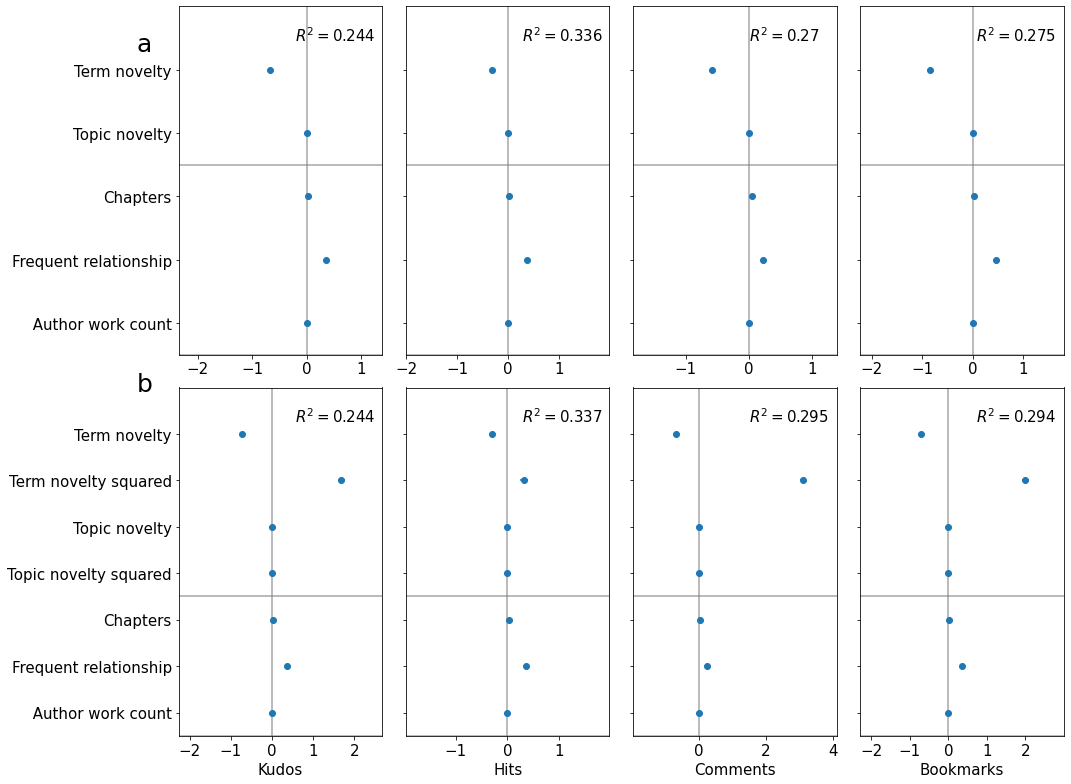

In [69]:
plot_fig(partial=True)


In [22]:
# plot_fig(partial=False)


In [70]:
print(kudos_model_sq_True.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     2023.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        16:37:32   Log-Likelihood:            -3.8057e+05
No. Observations:              276557   AIC:                         7.612e+05
Df Residuals:                  276512   BIC:                         7.617e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [71]:
print(hits_model_sq_True.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3199.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        16:37:34   Log-Likelihood:            -3.7213e+05
No. Observations:              276557   AIC:                         7.443e+05
Df Residuals:                  276512   BIC:                         7.448e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# print(comments_model.summary())

In [ ]:
# print(bookmarks_model.summary())

In [ ]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')